In [ ]:
# Chapter 5. RNN 
# PART 1: Understanding  plot sigmoid function và derivative
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(6, 4))
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3 / 4, 7 / 4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating Point', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating Point', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

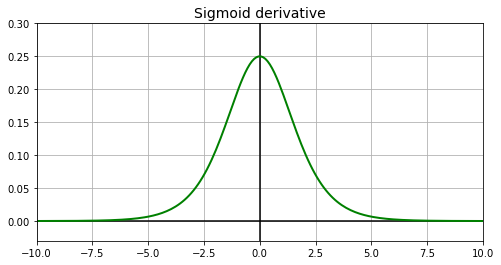

In [49]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
    
z = np.linspace(-10, 10, 200)

plt.figure(figsize=(8, 4))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([0, 0], [-0.03, 0.3], 'k-')
plt.plot(z, sigmoid_derivative(z), "g-", linewidth=2)
plt.grid(True)
plt.title("Sigmoid derivative", fontsize=14)
plt.axis([-10, 10, -0.03, 0.3])
plt.show()

In [1]:
# Exercise 23. 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Simple_RNN = Sequential()
# Recurrent Layer <Return Sequence = FALSE>
Simple_RNN.add(SimpleRNN(64, input_shape = (10,100), return_sequences = False))
# Fully Connected Layer
Simple_RNN.add(Dense(64, activation='relu'))
# Output Layer
Simple_RNN.add(Dense(100, activation='softmax'))
# Summary
Simple_RNN.summary()



Using TensorFlow backend.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
Total params: 21,220
Trainable params: 21,220
Non-trainable params: 0
_________________________________________________________________


In [3]:
#### None is the batch_size parameter which will be provided by fit(). Output of RNN layer is (None,64) since it is not returning the sequence
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Simple_RNN = Sequential()
# Recurrent Layer <Return Sequence = FALSE>
Simple_RNN.add(SimpleRNN(64, input_shape = (10,100), return_sequences = True))
# Fully Connected Layer
Simple_RNN.add(Dense(64, activation='relu'))
# Output Layer
Simple_RNN.add(Dense(100, activation='softmax'))
# Summary
Simple_RNN.summary()
#### Now that RNN layer is returning a sequence, -> output shape is 3D. (Dense layer is alsoe automatically adjusted to this change in its input)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10, 64)            10560     
_________________________________________________________________
dense_3 (Dense)              (None, 10, 64)            4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10, 100)           6500      
Total params: 21,220
Trainable params: 21,220
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Change the timesteps from 10 to 1000
Simple_RNN = Sequential()
# Recurrent Layer <Return Sequence = FALSE>
Simple_RNN.add(SimpleRNN(64, input_shape = (1000,100), return_sequences = True))
# Fully Connected Layer
Simple_RNN.add(Dense(64, activation='relu'))
# Output Layer
Simple_RNN.add(Dense(100, activation='softmax'))
# Summary
Simple_RNN.summary()
## the Shape changes following the input, but there is no chang in the parameters between the 2 models. 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1000, 64)          10560     
_________________________________________________________________
dense_5 (Dense)              (None, 1000, 64)          4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1000, 100)         6500      
Total params: 21,220
Trainable params: 21,220
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Exercise 24. Stateful vs Stateless (argument stateful =True/False)
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt


State_Model = Sequential()
#1. Recurrent layer <STATELESS>
State_Model.add(SimpleRNN(64, input_shape=(28,28), return_sequences = True, stateful = False))
# Fully connnected layer
State_Model.add(Dense(64, activation= 'relu'))
# Output layer 
State_Model.add(Dense(100, activation= 'softmax'))
# Summary
State_Model.summary()
# Set optimizer to Adam, categorical crosstropy as LOSS, metrics
State_Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
State_Model.fit(X_train,y_train, batch_size=32, epochs=100, shuffle=True)

#2 Assume that X, Y are training data as contiguous examples, turn model into a stateful one:
State_Model = Sequential()
# Recurrent layer <STATEFUL>
State_Model.add(SimpleRNN(64, input_shape=(1000,100), return_sequences = True, stateful = True))
# Fully connnected layer
State_Model.add(Dense(64, activation= 'relu'))
# Output layer 
State_Model.add(Dense(100, activation= 'softmax'))
# Set optimizer as Adam, categorical crossentropy as Loss, metrics
State_Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
State_Model.fit(X_train,y_train, batch_size= 1, epochs= 100, shuffle= False)

###3. Show output 
results.boxplot()
plt.show()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 28, 64)            5952      
_________________________________________________________________
dense_9 (Dense)              (None, 28, 64)            4160      
_________________________________________________________________
dense_10 (Dense)             (None, 28, 100)           6500      
Total params: 16,612
Trainable params: 16,612
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_10 to have 3 dimensions, but got array with shape (60000, 1)